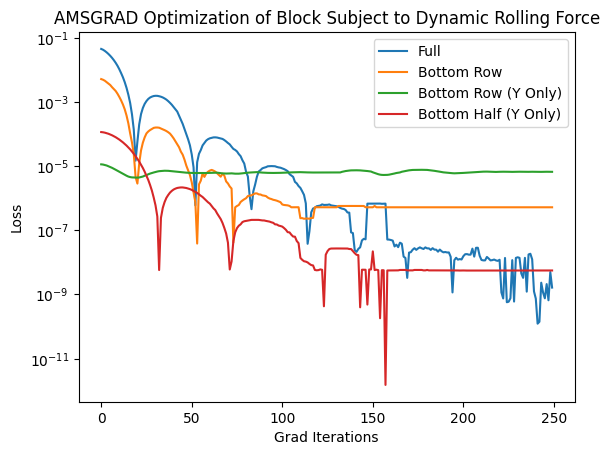

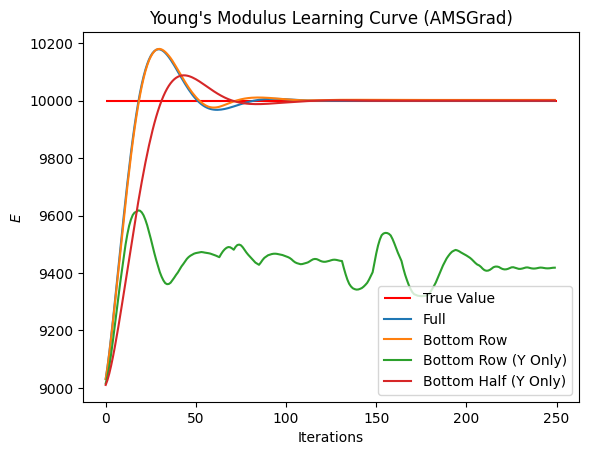

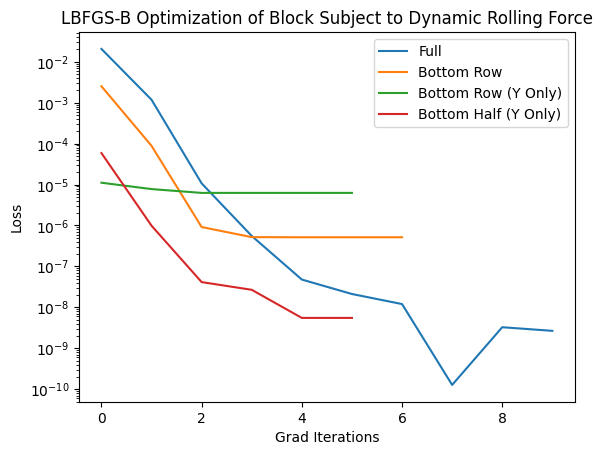

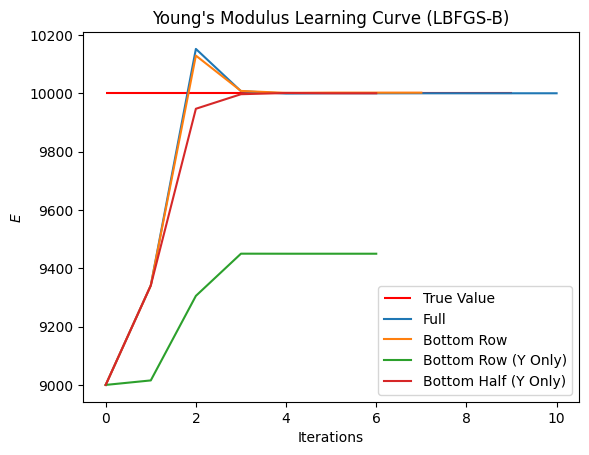

In [27]:
import matplotlib.pyplot as plt
import json

with open('result_full_grad.json') as json_file:
    result_full_grad = json.load(json_file)
with open('result_bot_grad.json') as json_file:
    result_bot_grad = json.load(json_file)
with open('result_bot_y_grad.json') as json_file:
    result_bot_y_grad = json.load(json_file)
with open('result_half_y_grad.json') as json_file:
    result_half_y_grad = json.load(json_file)

with open('result_full_lbfgs.json') as json_file:
    result_full_lbfgs = json.load(json_file)
with open('result_bot_lbfgs.json') as json_file:
    result_bot_lbfgs = json.load(json_file)
with open('result_bot_y_lbfgs.json') as json_file:
    result_bot_y_lbfgs = json.load(json_file)
with open('result_half_y_lbfgs.json') as json_file:
    result_half_y_lbfgs = json.load(json_file)


plt.title("AMSGRAD Optimization of Block Subject to Dynamic Rolling Force")
plt.ylabel("Loss")
plt.xlabel("Grad Iterations")
plt.plot(result_full_grad['losses'], label='Full')
plt.plot(result_bot_grad['losses'], label='Bottom Row')
plt.plot(result_bot_y_grad['losses'], label='Bottom Row (Y Only)')
plt.plot(result_half_y_grad['losses'], label='Bottom Half (Y Only)')
plt.yscale('log')
plt.legend()
plt.show()

plt.title("Young's Modulus Learning Curve (AMSGrad)")
plt.ylabel("$E$")
plt.xlabel("Iterations")
plt.hlines(1e4, 0, 250, color='r', label='True Value')
plt.plot(result_full_grad['es'], label='Full')
plt.plot(result_bot_grad['es'], label='Bottom Row')
plt.plot(result_bot_y_grad['es'], label='Bottom Row (Y Only)')
plt.plot(result_half_y_grad['es'], label='Bottom Half (Y Only)')
plt.legend()
plt.show()

plt.title("LBFGS-B Optimization of Block Subject to Dynamic Rolling Force")
plt.ylabel("Loss")
plt.xlabel("Grad Iterations")
plt.plot(result_full_lbfgs['losses'], label='Full')
plt.plot(result_bot_lbfgs['losses'], label='Bottom Row')
plt.plot(result_bot_y_lbfgs['losses'], label='Bottom Row (Y Only)')
plt.plot(result_half_y_lbfgs['losses'], label='Bottom Half (Y Only)')
plt.yscale('log')
plt.legend()
plt.show()

plt.title("Young's Modulus Learning Curve (LBFGS-B)")
plt.ylabel("$E$")
plt.xlabel("Iterations")
plt.hlines(1e4, 0, 9, color='r', label='True Value')
plt.plot(result_full_lbfgs['es'], label='Full')
plt.plot(result_bot_lbfgs['es'], label='Bottom Row')
plt.plot(result_bot_y_lbfgs['es'], label='Bottom Row (Y Only)')
plt.plot(result_half_y_lbfgs['es'], label='Bottom Half (Y Only)')
plt.legend()
plt.show()